# <font color='solid green' style='font-size: 30px;'>Projeto - Sistema de Avaliação dos Valores de Imóveis</font>
<hr style='border: 2px solid gray;'>

### <font color ='gray' style = 'font-size: 18px;'>Descrição</font>
<p style='font-size: 18px; line-height: 2;'>O projeto visa através do estudo e analises estatisticas dos dataset apresentado, desenvolver um modelo preditivo que permita mensurar os valoes adequados dos imóveis de acordo com as caracteristicas dos mesmos. São apresentadoso no dataset utilizados informações quanto a metragem dos imóveis, a sua distancia para a praia e farmacias, além do valor final dos mesmos.</p>

### <font color ='gray' style = 'font-size: 18px;'>Dados</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel</li>
    <li><b>Area</b> - Área do imóvel em m²</li>
    <li><b>Dist_Praia</b> - Distância do imóvel até a praia (km) (em linha reta)</li>
    <li><b>Dist_Farmacia</b> - Distância do imóvel até a farmácia mais próxima (km) (em linha reta)</li>
</ul>


## <font style = 'font-size: 18px;'>Importando bibliotecas</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import plotly.graph_objects as go
import plotly.express as px

## <font style = 'font-size: 18px;'>Carregando dados do dataset e iniciando analises preliminares</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>

In [2]:
raw_data = pd.read_csv('dataset.csv', sep = ';')
raw_data.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


## <font style = 'font-size: 18px;'>Verificando informações dos tipos de dados do dataset</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>

In [3]:
informacoes_dataset = {}
num_values = raw_data.shape[0]

for col in raw_data.columns:
    valores_nulos = round(raw_data[col].isna().sum()/num_values,2)
    tipo_dados = raw_data.dtypes[col]

    numero_total_valores = raw_data[col].value_counts().sum()
    for index, colnames in raw_data.items():
        informacoes_dataset[col] = {'Tipo de Dados':tipo_dados, 'Quantidade de Valores Nulos':valores_nulos,'Total de Valores':numero_total_valores}

info_df = pd.DataFrame.from_dict(informacoes_dataset, orient='index')
info_df

,Tipo de Dados,Quantidade de Valores Nulos,Total de Valores
Valor,int64,0.0,5000
Area,int64,0.0,5000
Dist_Praia,float64,0.0,5000
Dist_Farmacia,float64,0.0,5000


## <font style = 'font-size: 18px;'>Obtendo estatisticas desritivas gerais do dataset</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>

In [4]:
raw_data.describe()


,Valor,Area,Dist_Praia,Dist_Farmacia
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,1.402926e+06,121.944800,3.021920,0.497160
std,1.883269e+06,90.536969,3.170933,0.291355
min,7.500000e+04,16.000000,0.000000,0.000331
25%,4.600000e+05,70.000000,0.438417,0.238640
50%,8.200000e+05,93.000000,1.476958,0.503260
75%,1.590000e+06,146.000000,5.605379,0.747737
max,2.500000e+07,2000.000000,17.962942,0.999987


## <font style = 'font-size: 18px;'>Visualizando distribuições de cada uma das variáveis do dataset</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>

In [5]:
from plotly.subplots import make_subplots

fig = make_subplots(rows = 2, cols = 2, start_cell = 'top-left', subplot_titles= ('Área', 'Distancia Farmarcia', 'Distancia Praia', 'Valor'))

hist0 = go.Histogram(x = raw_data['Area'], nbinsx= 30)
hist1 = go.Histogram(x = raw_data['Dist_Farmacia'], nbinsx= 30)
hist2 = go.Histogram(x = raw_data['Dist_Praia'], nbinsx= 30)
hist3 = go.Histogram(x = raw_data['Valor'], nbinsx= 30)

fig.append_trace(hist0, 1, 1)
fig.append_trace(hist1, 1, 2)
fig.append_trace(hist2, 2, 1)
fig.append_trace(hist3, 2, 2)

fig.update_layout(
    title = { 'text':'Histogramas - Variaveis Dataset', 'y':0.9, 'x':0.48, 'xanchor':'center', 'yanchor':'top'}, 
    font = dict(family = 'Arial', size = 14, color = 'Black'),
    showlegend = False
    ) 
    
fig.show()

In [6]:
fig = make_subplots(rows = 2, cols = 2, start_cell = 'top-left', subplot_titles= ('Area', 'Distancia Farmarcia', 'Distancia Praia', 'Valor'))

box0 = go.Box(x = raw_data['Area'])
box1 = go.Box(x = raw_data['Dist_Farmacia'])
box2 = go.Box(x = raw_data['Dist_Praia'])
box3 = go.Box(x = raw_data['Valor'])

fig.append_trace(box0, 1, 1)
fig.append_trace(box1, 1, 2)
fig.append_trace(box2, 2, 1)
fig.append_trace(box3, 2, 2)

fig.update_layout(
    title = { 'text':'Boxplots - Variaveis Dataset', 'y':0.9, 'x':0.48, 'xanchor':'center', 'yanchor':'top'}, 
    font = dict(family = 'Arial', size = 14, color = 'Black'),
    showlegend = False
    ) 
    
fig.show()

## <font style = 'font-size: 18px;'>Definindo função para plotagem de gráficos do tipo boxplot</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>

In [7]:
def boxplot(coluna, dados, titulo):
    bx = px.box(x = coluna, data_frame = dados)
    bx.update_layout(
    title = { 'text':titulo, 'y':0.95, 'x':0.48, 'xanchor':'center', 'yanchor':'top'}, 
    font = dict(family = 'Arial', size = 14, color = 'Black')) 
    bx.show()
    

## <font style = 'font-size: 18px;'>Analisando Variável - Valor dos Imóveis</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>


### <font style = 'font-size: 18px;'>Analisando individualmente as variáveis valor e area</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>

In [8]:
boxplot('Valor',raw_data,'Boxplot - Preço dos Imóveis(R$)')

In [9]:
# Realizar o estudo da variavel para observar as caracteristicas dos imoveis mais caros e verificar se de fato fazem sentido
# Plotar os scatter para verificar possiveis comportamentos das disperções entre variaveis 
# Plotar o Heatmap para verificar a correlação das variaveis
# Realizar o teste T de Studente (Shapiro) para verificar a normalidade 
# Transformar dados 
# Realizar novamente o teste e validar a normalidade

## <font style = 'font-size: 18px;'>Verificando dispersão existente entre as variáveis presentes no dataset</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>

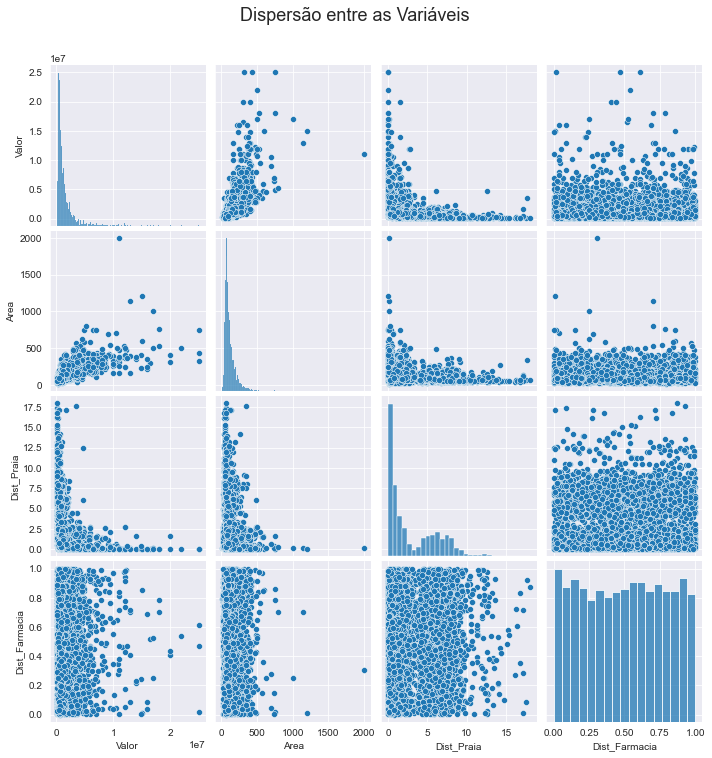

In [10]:
sns.set_style('darkgrid')
ax = sns.pairplot(raw_data)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=18, y=1.05)
ax


## <font style = 'font-size: 18px;'>Como observado pela analise da dispersão entre todas as variaveis, o valor e a área apresentam visualmente um comportamento correlacionado, assim foi realizado o plot da dispersão dos dois dados para observar.</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>

<AxesSubplot:title={'center':'Dispersão - Área x Valor'}, xlabel='Area', ylabel='Valor'>

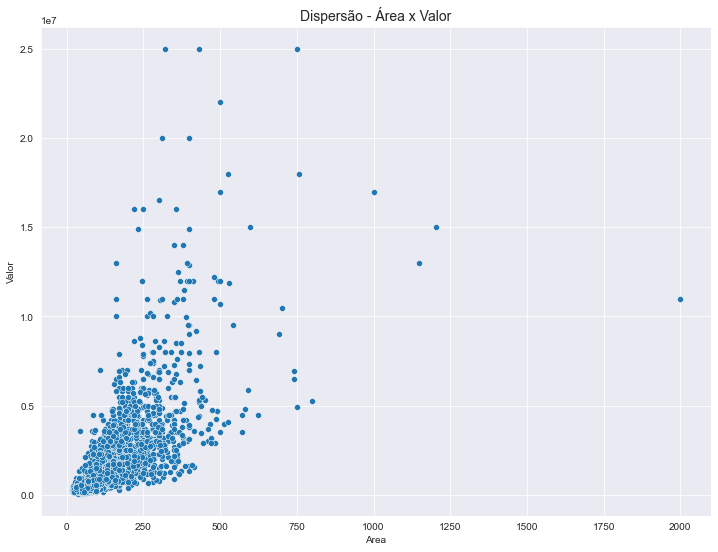

In [11]:
plt.subplots(figsize = (12,9))
ax2 = sns.scatterplot(x = 'Area', y = 'Valor', data = raw_data)
ax2.set_title('Dispersão - Área x Valor', fontsize = 14)
ax2

## <font style = 'font-size: 18px;'>Heatmap para identificação da correlação entre as variaveis, evidenciando as analises preliminares anteriormente realizada</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>

Text(0.5, 1.0, 'Heatmap - Correlação das Variáveis')

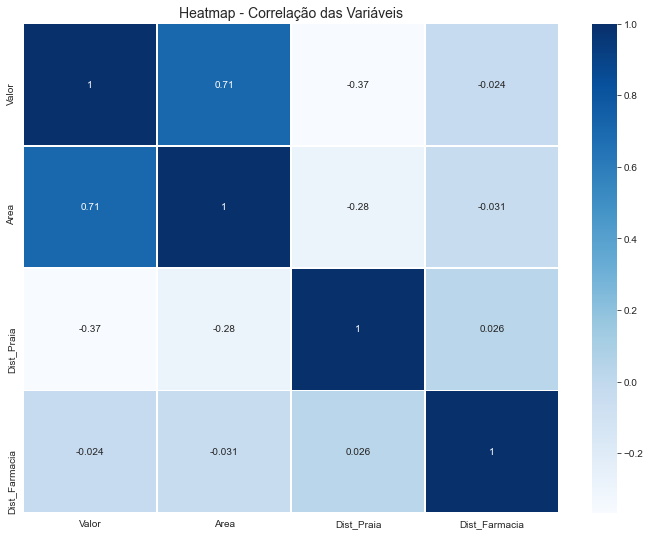

In [12]:
plt.subplots(figsize = (12,9))
ax3 = sns.heatmap(raw_data.corr(), linewidths = .5, cmap = 'Blues', annot = True  )
ax3.set_title('Heatmap - Correlação das Variáveis', fontsize = 14)

## <font style = 'font-size: 18px;'>Verificado numericamente a correlação entre as variaveis, se faz necessario a normalização dos dados para continuidade para obter o modelo preditivo. Ao longo das analises foi observado graficamente a assimetria dos dados, porem é importante identificar a ausencia da normalidade atraves de testes formais</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>

In [13]:
from scipy import stats

shapiro_test_area = stats.shapiro(raw_data['Area'])
shapiro_test_dist_farmacia = stats.shapiro(raw_data['Dist_Farmacia'])
shapiro_test_dist_praia = stats.shapiro(raw_data['Dist_Praia'])
shapiro_test_valor = stats.shapiro(raw_data['Valor'])

pd.DataFrame(index = ['Area','Valor','Dist_Praia','Dist_Farmacia'], columns = ['Valor P'] , 
            data = [round(shapiro_test_area.pvalue,3),round(shapiro_test_valor.pvalue,3),
            round(shapiro_test_dist_praia.pvalue,3),round(shapiro_test_dist_farmacia.pvalue,3)]
            )


,Valor P
Area,0.0
Valor,0.0
Dist_Praia,0.0
Dist_Farmacia,0.0


## <font style = 'font-size: 18px;'>Realizando a normalização dos dados do dataset</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>

In [14]:
normalized_data = pd.DataFrame()

normalized_data['log_Valor'] = np.log(raw_data['Valor'])
normalized_data['log_Area'] = np.log(raw_data['Area'])
normalized_data['log_Dist_Praia'] = np.log(raw_data['Dist_Praia'] + 1)
normalized_data['log_Dist_Farmacia'] = np.log(raw_data['Dist_Farmacia'] + 1)

normalized_data.head()

,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,15.341567,5.634790,0.215857,0.584245
1,13.710150,5.337538,0.644028,0.126187
2,14.751604,5.135798,0.057821,0.352991
3,13.217674,4.605170,1.356655,0.422036
4,14.603968,5.099866,0.214916,0.175946


## <font style = 'font-size: 18px;'>Verificando graficamente novo comportamento das variáveis no dataset normalizado</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>

In [15]:
fig2 = make_subplots(rows = 1, cols = 2, start_cell = 'top-left', subplot_titles= ('Área', 'Área (Normalizada'))

histArea0 = go.Histogram(x = raw_data['Area'], nbinsx= 50)
histArea1 = go.Histogram(x = normalized_data['log_Area'], nbinsx= 50)

fig2.append_trace(histArea0, 1,1)
fig2.append_trace(histArea1, 1,2)

fig2.update_layout(
    title = { 'text':'Comparação - Variaveis Áreas', 'y':0.9, 'x':0.48, 'xanchor':'center', 'yanchor':'top'}, 
    font = dict(family = 'Arial', size = 14, color = 'Black'),
    showlegend = False
    ) 

fig2.show()


## <font style = 'font-size: 18px;'>Realizada nova visualização das relações entre as variaveis, agora normalizadas avaliando novamente a relação entre as mesmas</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>

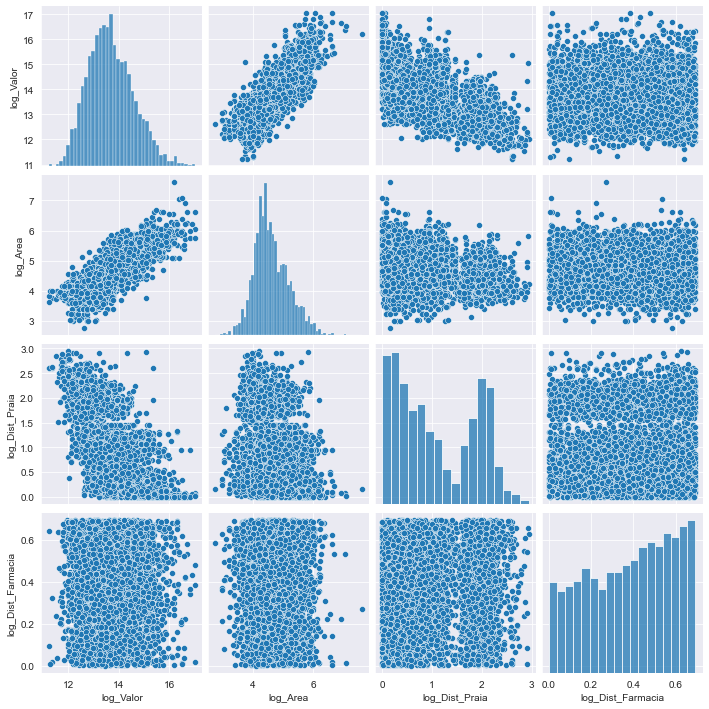

In [16]:
fig3 = sns.pairplot(data = normalized_data)

## <font style = 'font-size: 18px;'>Comparando novamente a relação entre a variavel valor e area, apos a normalização dos dados</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>

Text(0, 0.5, 'Valor')

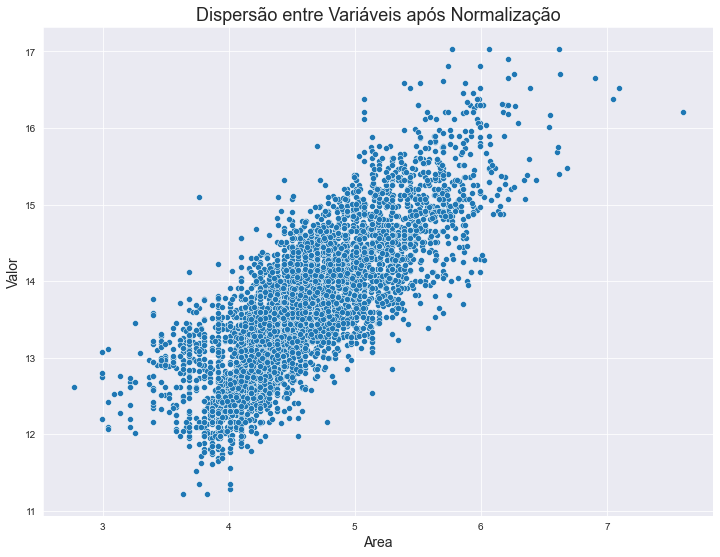

In [17]:
plt.subplots(figsize = (12,9))
fig4 = sns.scatterplot(data = normalized_data, y = 'log_Valor', x = 'log_Area')
fig4.set_title('Dispersão entre Variáveis após Normalização', fontsize = 18)
fig4.set_xlabel('Area', fontsize = 14)
fig4.set_ylabel('Valor', fontsize = 14)

## <font style = 'font-size: 18px;'>Inicio da Modelagem - Separação do Dataset em dados de treino e teste</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>



In [18]:
from sklearn.model_selection import train_test_split


In [19]:
#Definindo serie da variavel dependente
y = normalized_data['log_Valor']

#Definindo dataframe para as variaveis independentes
X = normalized_data[['log_Area','log_Dist_Praia','log_Dist_Farmacia']]

## <font style = 'font-size: 18px;'>Dividindo dados utilizando o train_test_split</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [21]:
import statsmodels.api as sm

## <font style = 'font-size: 18px;'>Realizando a estimativa e obtendo os resultados estatisticos do modelo</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>

In [22]:
X_train_constante = sm.add_constant(X_train)
X_train_constante.head()

,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
4833,1.0,4.682131,0.112998,0.377936
1218,1.0,4.248495,0.975139,0.476215
135,1.0,4.941642,0.406811,0.098407
3612,1.0,5.991465,1.207461,0.321155
3259,1.0,4.605170,0.526501,0.660861


In [23]:
modelo = sm.OLS(y_train, X_train_constante, hasconst = True).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     5466.
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:59:24   Log-Likelihood:                -2038.5
No. Observations:                4000   AIC:                             4085.
Df Residuals:                    3996   BIC:                             4110.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3661      0.06

## <font style = 'font-size: 18px;'>Os resultados encontrados o pvalue para cada uma das variaveis indica que o modelo é interessante para modelar os dados. Além disso é possivel observar que a variavel Distancia para a Farmacia, apresenta um pvaleu superior ao nivel de significancia (5%), sugerindo a possibilidade de uma modelagem retirando esta variavel.</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>


## <font style = 'font-size: 18px;'>Nova modelagem retirando a variável Distancia para a farmácia</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>

In [24]:
X = normalized_data[['log_Area','log_Dist_Praia']]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
X_train_com_constante = sm.add_constant(X_train)


In [25]:
modelo2 = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     8200.
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:59:24   Log-Likelihood:                -2038.8
No. Observations:                4000   AIC:                             4084.
Df Residuals:                    3997   BIC:                             4102.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3564      0.059    158.

## <font style = 'font-size: 18px;'>Com a modelagem realizada retirando a variavel Distancia para a Farmacia, observamos que o modelo esta bem ajustado. O valor do teste F, inferior ao nivel de significancia e dos pvalue para cada uma das variaveis indica este bom ajuste. Além disso o R2 indica 80,4% da variação explicada atraves do modelo criado.</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>


## <font style = 'font-size: 18px;'>Estimando valores através do modelo preditivo criado</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics 


In [27]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

## <font style = 'font-size: 18px;'>Criando simuladro para obter o valores dos imóveis</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>

In [28]:
Area = int(input('Area do Imovel:'))
Dist_Praia = int(input('Distancia da praia ao imovel:'))

valores_inputados = [[np.log(Area), np.log(Dist_Praia + 1)]]
print('R$ {0:.2f}'.format(np.exp(modelo.predict(valores_inputados)[0])))


R$ 1322549.72


## <font style = 'font-size: 18px;'>Visualização gráfica da dispersão entre os valores previstos e reais</font>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>

Text(0.5, 0, 'Preço Previsto')

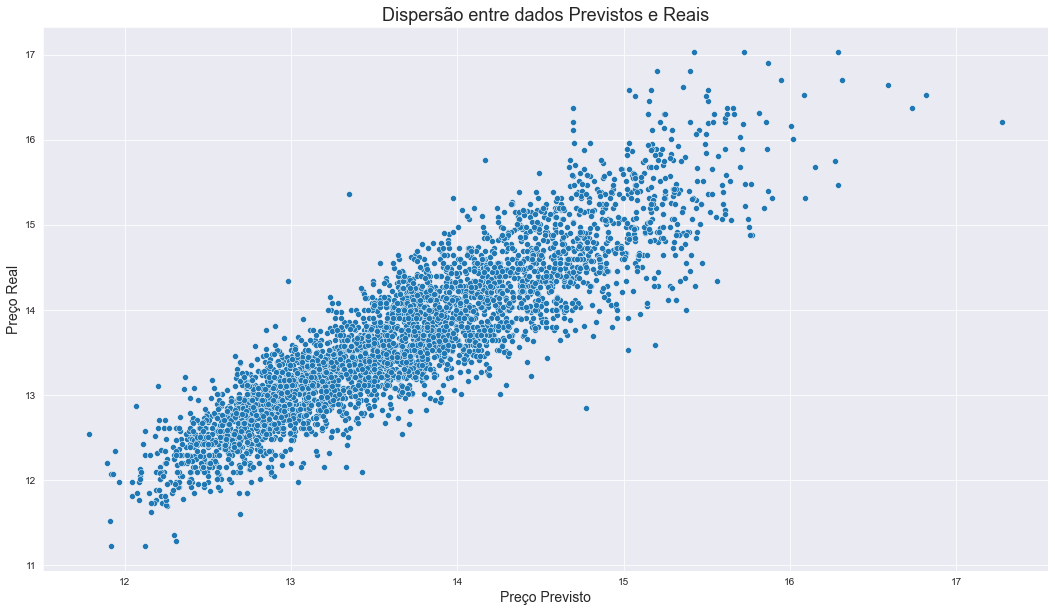

In [29]:
y_previsto_train = modelo.predict(X_train)

plt.subplots(figsize = (18,10))
fig5 = sns.scatterplot(x = y_previsto_train, y = y_train)
fig5.set_title('Dispersão entre dados Previstos e Reais', fontsize = 18)
fig5.set_ylabel('Preço Real', fontsize = 14)
fig5.set_xlabel('Preço Previsto', fontsize = 14)